In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/Metaculus/Mobility/master/MobilityData.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df.head(n=4)

,geo_type,region,transportation_type,alternative_name,sub-region,country,13/01/2020,14/01/2020,15/01/2020,16/01/2020,...,09/10/2020,10/10/2020,11/10/2020,12/10/2020,13/10/2020,14/10/2020,15/10/2020,16/10/2020,17/10/2020,18/10/2020
0,city,New York City,transit,NYC,New York,United States,100.0,92.66,95.29,96.42,...,61.50,65.53,48.49,42.43,47.13,52.71,54.51,51.44,65.09,50.49
1,city,San Francisco - Bay Area,transit,NaN,California,United States,100.0,101.59,104.05,97.69,...,39.29,36.33,35.44,37.84,36.41,37.35,37.83,42.93,39.27,35.45
2,county,Baltimore City,transit,NaN,Maryland,United States,100.0,98.59,102.63,97.84,...,65.76,60.44,46.18,57.06,57.56,60.84,65.83,61.49,66.89,52.70
3,city,Phoenix,transit,NaN,Arizona,United States,100.0,106.52,101.87,100.82,...,65.56,61.40,50.65,61.31,63.05,63.31,61.75,65.57,63.15,52.00


In [4]:
df = df.head(n=4)

In [30]:
def get_moving_avgs(row):
    data = df.loc[row,df.columns[6:]].astype(float).fillna(method='pad')
    if row == 0:
        data = np.concatenate((data, np.array([50.52, 50.32, 51.62, 53.26, 62.07, 64.22, 47.94, 48.25, 50.23, 49.65, 46.44])))
    if row == 1:
        data = np.concatenate((data, np.array([36.25, 37.58, 36.15, 36.49, 41.28, 37.78, 34.3, 36.39, 33.69, 36.95, 36.46])))
    if row == 3:
        data = np.concatenate((data, np.array([63.8, 61.37, 64.18, 61.66, 66.86, 63.98, 51.12, 60.42, 60.4, 58.89, 64.03])))
    return [sum(data[end_idx-7:end_idx])/7 for end_idx in range(7,len(data)+1)]

def plot(data):
    sns.lineplot(x=range(len(moving_avgs)), y=moving_avgs)
    
def reg_plot_after(data, cutoff):
    sns.regplot(x=list(range(cutoff, len(data))), y=data[cutoff:])
    
def fit_and_predict(data, cutoff):
    reg = LinearRegression().fit(np.arange(cutoff, len(data)).reshape(-1,1), data[cutoff:])
    last_day = date.today()
    resolution_date_1 = date(year=2020,month=10,day=31)
    delta_1 = resolution_date_1 - last_day 
    prediction_1 = reg.predict([[len(data)-1+delta_1.days]]) + (data[-1] - (reg.predict([[len(data)-1]])))
    resolution_date_2 = date(year=2020,month=11,day=28)
    delta_2 = resolution_date_2 - last_day 
    prediction_2 = reg.predict([[len(data)-1+delta_2.days]]) + (data[-1] - (reg.predict([[len(data)-1]])))
    print(f'Predictions: {prediction_1[0]} {prediction_2[0]}')

## New York

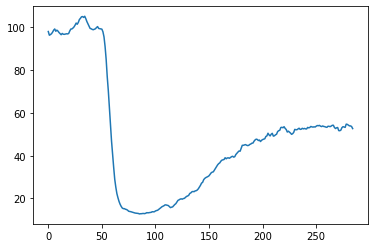

In [20]:
moving_avgs = get_moving_avgs(0)
plot(moving_avgs)

Recent trend

Predictions: 52.703705936920215 53.20747217068645


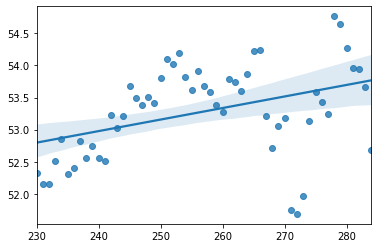

In [21]:
CUTOFF = 230
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

Extremely recent trend

Predictions: 52.38045918367346 43.833316326530586


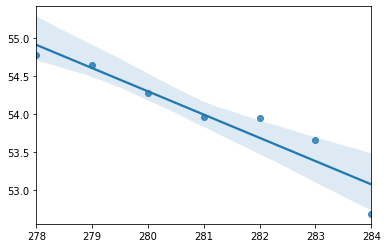

In [24]:
CUTOFF = 278
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

## SF

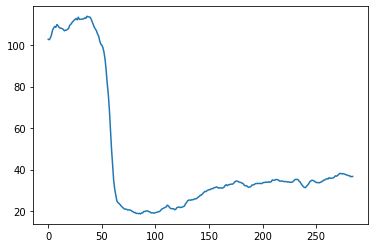

In [26]:
moving_avgs = get_moving_avgs(1)
plot(moving_avgs)

Recent trend

Predictions: 36.731312220410544 37.808054391906005


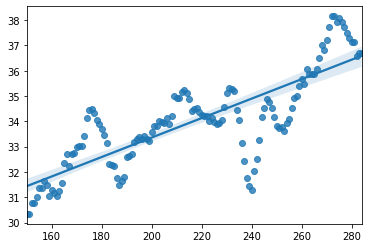

In [27]:
CUTOFF = 150
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

Very recent trend

Predictions: 36.522121212121206 31.741515151515124


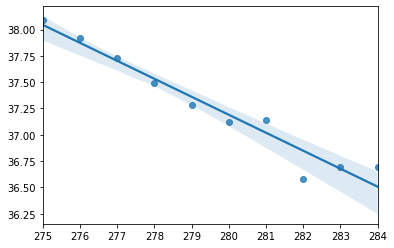

In [29]:
CUTOFF = 275
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

## Phoenix

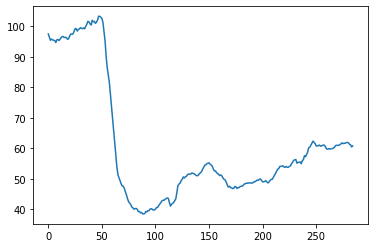

In [31]:
moving_avgs = get_moving_avgs(3)
plot(moving_avgs)

Recent trend

Predictions: 60.97571152181803 65.49563413272284


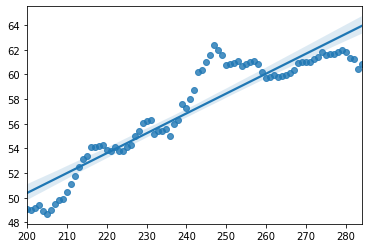

In [32]:
CUTOFF = 200
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

Predictions: 60.89280439560439 63.09132747252745


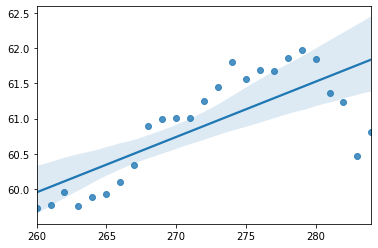

In [36]:
CUTOFF = 260
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)

Very recent trend

Predictions: 60.57270408163264 53.80841836734686


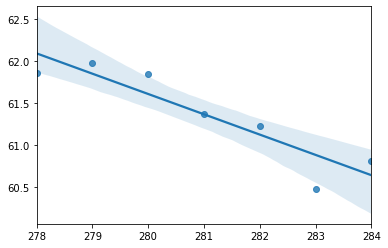

In [34]:
CUTOFF = 278
reg_plot_after(moving_avgs, CUTOFF)
fit_and_predict(moving_avgs, CUTOFF)